In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
project_path = '/content/drive/My Drive/'

The dataset is too big and heavy to use local Colab resources, so I had to mount it at my personal Google Drive and read it from there

In [4]:
# import h5py to ready h5 file
import h5py

# Open the file as read only
h5f = h5py.File(project_path + 'SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file after selecting train / test datasets
h5f.close()

In [5]:
# checking length and size of train / test datasets
len(X_train), len(X_test), X_train.shape, X_test.shape

(42000, 18000, (42000, 32, 32), (18000, 32, 32))

**Visualizing images**
Use X_train to visualize the first 10 images
Use Y_train to print the first 10 labels

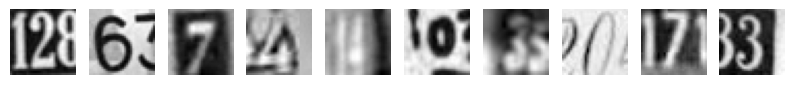

labels for each image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('labels for each image: %s' % (y_train[0:10]))

Not very good quality pictures and numbers are very close to each one

### Data Preparation

In [7]:
# Shape of the images and the first image pixels

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [8]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [9]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

In [10]:
# New shape 
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [11]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
print(X_train.shape)
print(y_train.shape)

(42000, 1024)
(42000, 10)


### Model Building

I plan to create a first model to epxlore the overall performance. Based on first results, I may create a more complex model

In [13]:
# Setting seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [14]:
#Importing losses and optimizers modules from tensorflow
from tensorflow.keras import losses
from tensorflow.keras import optimizers

# Define the function to create first basic model
def nn_model_1():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1024, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
    ]) 
    
    # adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=0.001)
    
    # compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics = ['accuracy'])
    return model

In [15]:
# Build the model
model_1 = nn_model_1()

In [16]:
#Print the summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=128, verbose = 1)

Epoch 1/20
263/263 [==============================] - 6s 11ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 3s 11ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 3s 10ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 4s 16ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 3s 11ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 2s 9ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 2s 8ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
E

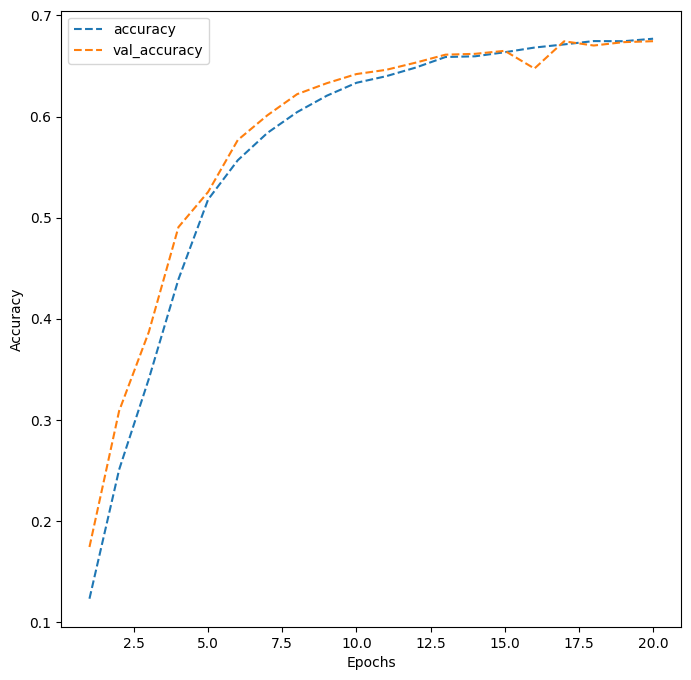

In [18]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**

As the Accuracy of both training and validation is very close, indicates that the model is not overfitting the training dataset.

The Accuracy starts to increase steadily until epoch 6, then it increases in a lower rate until epoch 17 where we observe minimum increase afterward.

We can see that the accuracy of validation dataset is slightly higher than the training dataset until epoch 10, where they start replacing places. This could give a sign that the model starts to fit the training dataset better, but not to the point of overfitting yet.

Overall, the model is not overfit and is giving accuracy of 0.7 on training dataset and roughly the same on validation dataset.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

In [19]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation='relu', input_shape=(1024, )),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(10, activation = 'softmax')             
    ]) 
    
    # adam optimizer with learning rate of 0.0005 
    adam = optimizers.Adam(learning_rate=0.0005)
    
    # compile the model
    model.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics= ['accuracy'])
    
    return model

In [20]:
# Build the model
model_2 = nn_model_2()

In [21]:
#Print the model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 310,122
Trainable params: 310,122
Non-tr

In [22]:
# Fit the model
history_model_2 = model_2.fit(X_train,y_train, epochs=50, validation_split=0.2, batch_size=128, verbose = 1)

Epoch 1/50
263/263 [==============================] - 5s 12ms/step - loss: 2.2544 - accuracy: 0.1293 - val_loss: 2.1245 - val_accuracy: 0.1737
Epoch 2/50
263/263 [==============================] - 3s 11ms/step - loss: 1.9788 - accuracy: 0.2669 - val_loss: 1.7731 - val_accuracy: 0.3882
Epoch 3/50
263/263 [==============================] - 5s 19ms/step - loss: 1.6053 - accuracy: 0.4460 - val_loss: 1.4364 - val_accuracy: 0.5246
Epoch 4/50
263/263 [==============================] - 4s 14ms/step - loss: 1.3750 - accuracy: 0.5442 - val_loss: 1.2829 - val_accuracy: 0.5860
Epoch 5/50
263/263 [==============================] - 3s 12ms/step - loss: 1.2118 - accuracy: 0.6118 - val_loss: 1.1548 - val_accuracy: 0.6343
Epoch 6/50
263/263 [==============================] - 3s 12ms/step - loss: 1.1440 - accuracy: 0.6363 - val_loss: 1.1717 - val_accuracy: 0.6270
Epoch 7/50
263/263 [==============================] - 4s 17ms/step - loss: 1.0881 - accuracy: 0.6554 - val_loss: 1.0481 - val_accuracy: 0.6751

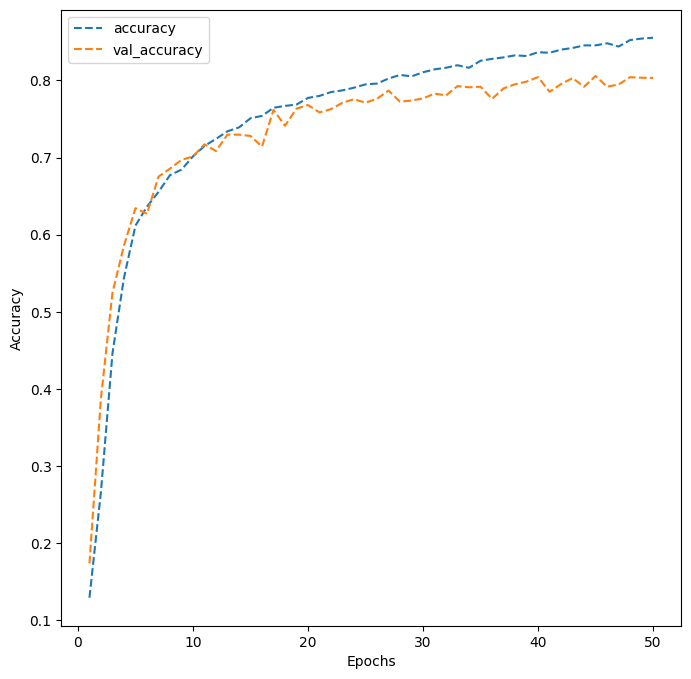

In [23]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,51)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**

Accuracy of both training dataset and validation dataset is symetric to some level. This rejects any overfitting concerns.

Accuracy of both is growing rapidly as the model progresses with epochs to 8, then accuracy still improves, but slowly.

After epoch 7 we can see small ups and downs in the validation dataset accuracy. This is not a concern as the overall trend is positive.

Overall the model is better than the previous with accuracy of 0.85 compared to 0.80.

### Predictions on test data

In [24]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

563/563 [==============================] - 2s 3ms/step


In [25]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1814
           1       0.79      0.85      0.82      1828
           2       0.78      0.84      0.81      1803
           3       0.82      0.73      0.77      1719
           4       0.84      0.83      0.83      1812
           5       0.83      0.76      0.79      1768
           6       0.80      0.81      0.81      1832
           7       0.85      0.83      0.84      1808
           8       0.81      0.74      0.77      1812
           9       0.80      0.79      0.79      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



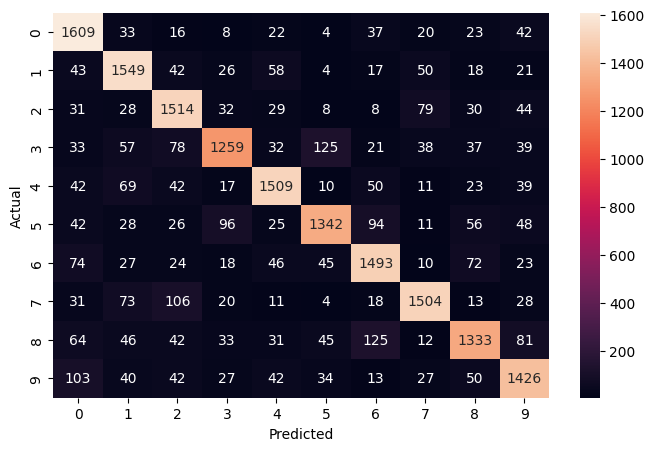

In [26]:
# Printing Validation Report and Confusion Matrix
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**

The classification report tells us that numbers 0, 4 and 7 have the highest f1-score (0.83 - 0.84) meaning they have the best chances of being accurately recognized. Whereas, numbers 3 and 8 have the lowest f1-score of (0.77).

Number 0 has the lowest precision and 7 has the highest, this means that the model is classifing other numbers as 0 which not valid. Whereas 7 has the lowest chances of being invalidly positive.

Number 0 has the highest recall, whereas 3 and 8 have the lowest. It indicates that the model is struggling to identify all 3's and 8's as what they are.

The confusion matrix shows that the model confused 2 with 7 and 6 with 8.